In [1]:
import geopandas as gpd

blocks = gpd.read_file('./data/blocks.geojson')
blocks

,id,Тип функциональной зоны,isAvailable,geometry
0,PZZ-468,2,True,"POLYGON ((30.99391 59.92460, 30.99453 59.92511..."
1,PZZ-469,2,True,"POLYGON ((30.99453 59.92511, 30.99515 59.92562..."
2,PZZ-470,2,True,"POLYGON ((30.99515 59.92562, 30.99972 59.92939..."
3,PZZ-471,2,True,"POLYGON ((31.00236 59.92894, 31.01333 59.92706..."
4,PZZ-472,2,True,"POLYGON ((31.01333 59.92706, 31.02331 59.92535..."
...,...,...,...,...
64,PZZ-532,2,True,"POLYGON ((31.00357 59.92283, 31.00076 59.92376..."
65,PZZ-533,2,True,"POLYGON ((31.00811 59.92319, 31.00530 59.92399..."
66,PZZ-534,2,True,"POLYGON ((31.00076 59.92376, 30.99796 59.92469..."
67,PZZ-535,2,True,"POLYGON ((31.00530 59.92399, 31.00238 59.92485..."


In [2]:
# from lu_igi.models.land_use import LandUse

# land_use_ids_mapping = {
#     1 : LandUse.RESIDENTIAL,
#     2 : LandUse.RECREATION,
#     3 : LandUse.SPECIAL,
#     4 : LandUse.INDUSTRIAL,
#     5 : LandUse.AGRICULTURE,
#     6 : LandUse.TRANSPORT,
#     7 : LandUse.BUSINESS,
#     10 : LandUse.RESIDENTIAL,
#     11 : LandUse.RESIDENTIAL,
#     12 : LandUse.RESIDENTIAL,
#     13 : LandUse.RESIDENTIAL,
# }

In [3]:
from lu_igi.preprocessing.graph import generate_adjacency_graph, save_graph, load_graph

blocks['land_use'] = None
graph = generate_adjacency_graph(blocks)

2025-02-13 19:10:00.045 | INFO     | lu_igi.preprocessing.graph:generate_adjacency_graph:65 - Validating input
2025-02-13 19:10:00.064 | INFO     | lu_igi.preprocessing.graph:_generate_adjacency_edges:47 - Generating edges
100%|██████████| 484/484 [00:00<00:00, 12910.80it/s]
2025-02-13 19:10:00.137 | SUCCESS  | lu_igi.preprocessing.graph:generate_adjacency_graph:79 - Graph successfully generated


In [4]:
from lu_igi.optimization.optimizer import Optimizer

optimizer = Optimizer(graph)

100%|██████████| 484/484 [00:00<00:00, 75951.93it/s]


In [5]:
from lu_igi.optimization.problem import FitnessType
from lu_igi.models.land_use import LandUse

target_lu_shares = {
    LandUse.RESIDENTIAL : 0.5,
    LandUse.RECREATION : 0.3,
    LandUse.BUSINESS : 0.2
}
fitness_types = [
    FitnessType.ADJACENCY_PENALTY, 
    FitnessType.PROBABILITY, 
    FitnessType.SHARE_MSE
]

blocks_ids = list(blocks.index)
results = optimizer.run(blocks_ids, target_lu_shares, fitness_types, n_eval=5_000)

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |       10 |      1 |             - |             -
     2 |       20 |      2 |  1.7770074059 |         ideal
     3 |       30 |      5 |  0.2225464661 |         ideal
     4 |       40 |      4 |  0.5506062827 |         ideal
     5 |       50 |      5 |  0.3646859357 |         ideal
     6 |       60 |      6 |  0.2394006865 |         ideal
     7 |       70 |      7 |  0.0722731915 |             f
     8 |       80 |      3 |  0.2384625635 |         ideal
     9 |       90 |      4 |  0.4775710052 |         ideal
    10 |      100 |      6 |  0.0818739229 |         ideal
    11 |      110 |      9 |  0.0536817206 |             f
    12 |      120 |     10 |  0.0426435925 |             f
    13 |      130 |     10 |  0.0309551303 |             f
    14 |      140 |     10 |  0.0904554932 |         ideal
    15 |      150 |     10 |  0.0102956995 |             f
    16 |      160 |     10 |  0.1258694450 |         ide

In [6]:
best_solutions = optimizer.best_solutions(results, fitness_types)
best_solutions

{<FitnessType.ADJACENCY_PENALTY: 'Конфликт размещения функциональных зон'>: {'X': array([1., 1., 6., 4., 6., 2., 4., 4., 3., 3., 2., 6., 2., 5., 5., 6., 6.,
         4., 3., 2., 3., 2., 4., 5., 4., 6., 5., 4., 6., 2., 6., 1., 3., 2.,
         1., 4., 4., 1., 4., 6., 2., 6., 4., 2., 4., 2., 4., 3., 2., 1., 2.,
         4., 4., 5., 6., 0., 1., 6., 6., 2., 4., 2., 2., 1., 1., 6., 5., 0.,
         6.]),
  'f': 1.2455938944899903e-09},
 <FitnessType.PROBABILITY: 'Вероятность перехода'>: {'X': array([0.93409895, 0.31720391, 2.02603528, 2.        , 0.9245961 ,
         0.        , 0.34687251, 1.17144166, 0.04554314, 1.61307163,
         0.028058  , 0.10193102, 0.        , 5.        , 1.11261284,
         5.99683463, 2.05829869, 5.        , 1.        , 2.        ,
         0.98436052, 0.        , 0.        , 2.03067365, 0.        ,
         1.        , 3.07037485, 2.00722636, 2.11448502, 0.46623826,
         6.        , 0.92315555, 0.95542491, 0.35389969, 2.        ,
         0.01948538, 0.717

In [33]:
population_size = 10

import pandas as pd

pd.DataFrame.from_dict({
    'x': list(results.X),
    'f': list(results.F)
})

,x,f
0,"[0.9340989492764014, 0.3172039069126076, 2.026...","[1.0603213613073273e-07, -0.0, 0.0034381436987..."
1,"[1.0, 1.0, 6.0, 4.0, 6.0, 2.0, 4.0, 4.0, 3.0, ...","[1.2455938944899903e-09, -0.0, 0.2478369749054..."
2,"[2.0, 6.0, 4.0, 4.0, 1.9998832667152757, 1.0, ...","[3.2379977920563314e-08, -0.0, 0.0414566413728..."
3,"[4.0, 5.0, 0.0, 0.0, 3.0, 5.0, 3.0, 2.0, 2.0, ...","[1.4010842949465755e-08, -0.0, 0.1058454195338..."
4,"[4.0, 5.0, 5.0, 0.0, 3.0, 5.0, 3.0, 2.0, 2.0, ...","[1.2158472316937958e-08, -0.0, 0.1319468170790..."
5,"[2.0, 0.2866267877173879, 6.0, 1.0, 2.00130592...","[4.972385629118608e-08, -0.0, 0.03045349976297..."
6,"[1.0, 1.0, 6.0, 4.0, 6.0, 2.0, 4.0, 4.0, 3.0, ...","[6.591756616857789e-09, -0.0, 0.21065010146256..."
7,"[2.0578744705871648, 0.28630821207448354, 3.0,...","[9.752141624945608e-08, -0.0, 0.00934276941753..."
8,"[2.0, 3.0, 2.018814755518469, 5.76757645353408...","[7.26648855054351e-08, -0.0, 0.01107005372824215]"
9,"[2.0, 3.0, 6.0, 5.7675764535340805, 2.00129256...","[7.039752022913868e-08, -0.0, 0.01948265683828..."


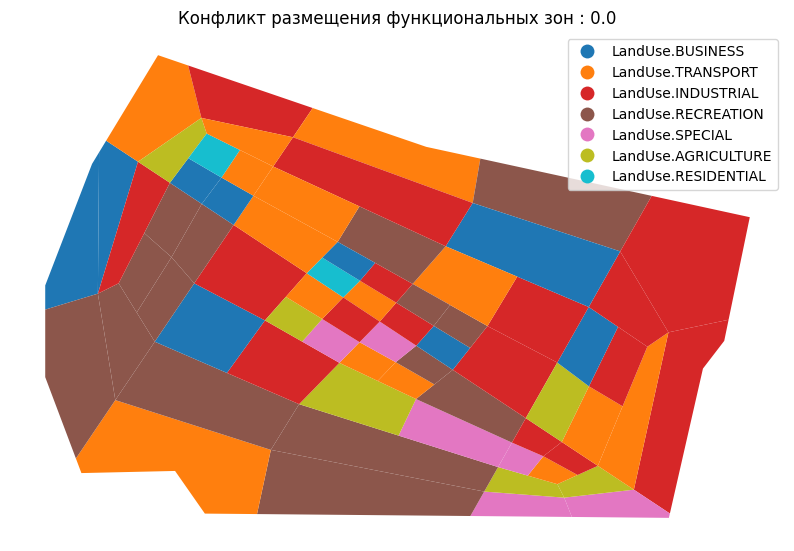

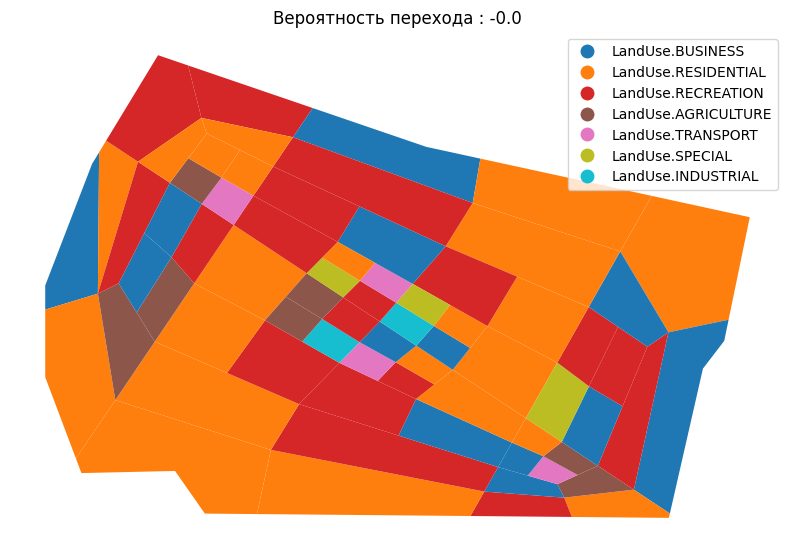

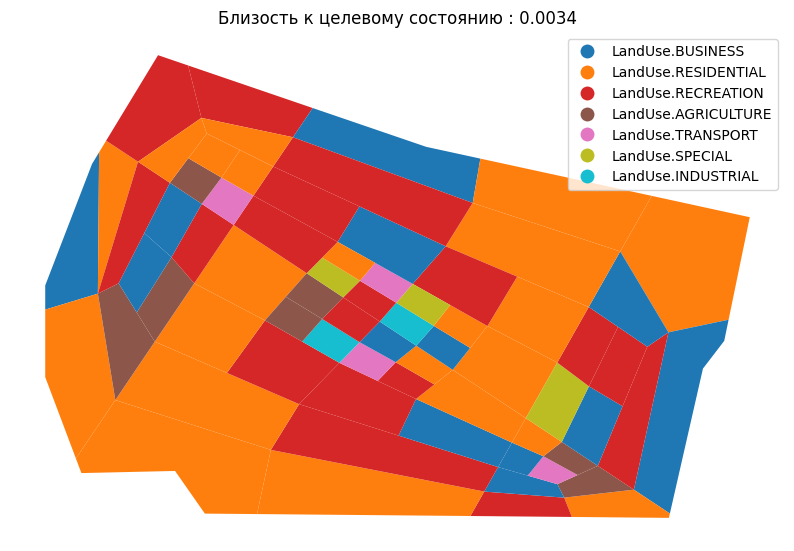

In [7]:
for fitness_type, d in best_solutions.items():
    X,f = d.values()
    gdf = optimizer.to_gdf(X,blocks_ids)
    optimizer.plot(gdf, title=f'{fitness_type.value} : {round(f,4)}', figsize=(10,10))